# 2D Head Visualizations

## 2D topographic head map

The 2D topographic head map provides a view of voltage measurements as a heatmap imposed on an image of a 2D skull. It can be generated as an [animation](#animation) to view changes over time or as a [standalone plot](#plot). 

![](instruction_imgs/topo_2d.gif)

## General Setup
### Import required modules

In [1]:
from simpl_eeg import topomap_2d, eeg_objects 

In [2]:
import warnings
warnings.filterwarnings('ignore')

```{note}
Please include the line below in your IDE so that the changes would be simultaneously reflected when you make a change to the python scripts.**
```

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

### Create epoched data
For additional options see [Creating EEG Objects](eeg_objects.html#intro) section.

In [5]:
experiment_folder = "../../data/109"
nth_epoch = 0
num_steps = 50  # number of steps to skip to shorten epoch

epochs = eeg_objects.Epochs(experiment_folder)
epoch = epochs.get_nth_epoch(nth_epoch)
shortened_epoch = epochs.skip_n_steps(num_steps)

Reading /Users/sasha/mds/simpl_eeg_capstone/data/109/fixica.fdt


Not setting metadata


Not setting metadata


33 matching events found


Setting baseline interval to [-0.2998046875, 0.0] sec


Applying baseline correction (mode: mean)


0 projection items activated


Loading data for 33 events and 2049 original time points ...


0 bad epochs dropped


<a id="animation"></a>
## Create a 2D topographic animation

### Define parameters
A detailed description of all animation parameters can be found in the `topomap_2d.animate_topomap_2d` docstring:

In [6]:
help(topomap_2d.animate_topomap_2d)

Help on function animate_topomap_2d in module simpl_eeg.topomap_2d:

animate_topomap_2d(epoch, colormap='RdBu_r', mark='dot', contours=0, sphere=100, cmin=-30, cmax=30, res=100, extrapolate='head', outlines='head', axes=None, mask=None, mask_params=None, colorbar=True, timestamp=True, frame_rate=12)
    Plots a still image mne.epochs.Epochs EEG data as a 2D topomap using the mne.viz.plot_topomap
    function.
    
    Parameters
    ----------
    epochs : mne.epochs.Epochs
        MNE epochs object containing portions of raw EEG data built around specified timestamp(s)
    
    colormap: matplotlib colormap or None
        Specifies the 'colormap' parameter in the mne.viz.plot_topomap() function.
    
    mark: str
        Specifies what kind of marker should be shown for each node on the topomap. Can be one of
        'dot', 'r+' (for red +'s), 'channel_name', or 'none'.
    
    contours: int or array of float
        specifies the 'contours' parameter in the mne.viz.plot_topomap() 

In [7]:
# change values below to values of interest
cmin = -40
cmax = 40
colormap = "Spectral"
mark = "dot"
contours = "6"
sphere = 100
res = 100
extrapolate = "head"
outlines = "head"
axes = None
mask = None
mask_params = None
colorbar = True
timestamp = True
frame_rate = 12

### Generating the animation

In [8]:
%%capture

anim = topomap_2d.animate_topomap_2d(
    shortened_epoch,
    colormap=colormap,
    mark=mark,
    contours=contours,
    sphere=sphere,
    cmin=cmin,
    cmax=cmax,
    res=res,
    extrapolate=extrapolate,
    outlines=outlines,
    axes=axes,
    mask=mask,
    mask_params=mask_params,
    colorbar=colorbar,
    timestamp=timestamp,
    frame_rate=frame_rate,
)

from IPython.core.display import HTML

html_plot = anim.to_jshtml()
video = HTML(html_plot)

In [9]:
video

### Saving the animation

#### Save as html

```python
html_file_path = "examples/topo_2d.html"
html_file = open(html_file_path, "w")
html_file.write(html_plot)
html_file.close()
```

#### Save as gif

```python
anim = topomap_2d.animate_topomap_2d(shortened_epoch)

gif_file_path = "examples/topo_2d.gif"
anim.save(gif_file_path, fps=5, dpi=300)
```

#### Save as mp4

```python
anim = topomap_2d.animate_topomap_2d(shortened_epoch)

mp4_file_path = "examples/topo_2d.mp4"
anim.save(mp4_file_path)
```

```{note}
If `FFMpegWriter` does not work on your computer you can save the file as a gif first and then convert it into mp4 file by running the code below.
```
```python
import moviepy.editor as mp

clip = mp.VideoFileClip(gif_file_path)
clip.write_videofile(mp4_file_path)
```

<a id="plot"></a>
## Create a 2D topographic plot

### Define parameters
A detailed description of all animation parameters can be found in the `topomap_2d.plot_topomap_2d` docstring:

In [10]:
help(topomap_2d.plot_topomap_2d)

Help on function plot_topomap_2d in module simpl_eeg.topomap_2d:

plot_topomap_2d(epoch, plotting_data=None, recording_number=0, colormap='RdBu_r', colorbar=True, cmin=-30, cmax=30, mark='dot', contours=0, sphere=100, res=100, extrapolate='head', outlines='head', axes=None, mask=None, mask_params=None, timestamp=True)
    Plots a still image mne.epochs.Epochs EEG data as a 2D topomap using the mne.viz.plot_topomap
    function.
    
    Parameters
    ----------
    epoch : mne.epochs.Epochs
        MNE epochs object containing portions of raw EEG data built around specified timestamp(s)
    
    plotting_data: numpy.ndarray
        array of the EEG data from a measurement (not a time interval) to be plotted
    
    recording_number: int
        The "frame" of the epoch to show in the plot.
    
    colormap: matplotlib colormap or None
        Specifies the 'colormap' parameter in the mne.viz.plot_topomap() function.
    
    colorbar: bool
        Specifies whether to include a colo

In [11]:
timestamp=None

### Generating a standalone plot

```{note}
Generating a plot will use the first frame in the epoch, so make sure to update your epoch object to contain your frame of interest. 
```

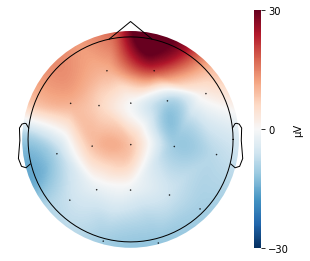

In [12]:
plot = topomap_2d.plot_topomap_2d(
    epoch,
    timestamp=timestamp
)
plot;

### Saving the plot
You can change the plot to different formats by changing the format argument in the function. It supports 'png', 'pdf', 'svg'.
```python
file_path = "examples/topo_2d.svg"
plot.figure.savefig(file_path)
```